# Final Project: Global Terrorims Database.

### 1. Problem statement:
You are being given the task to predict incidents of terrorism through machine learning and data mining. Terrorism is a complex, dynamic and continuously evolving phenomenon. In past few decades, Pakistan has seen an increased number of such incidents across the country. Currently, these terrorist incidents are highly unpredictable which gives an edge to the terrorist groups to attack by surprise. 
A model is required to carry out comprehensive trend/ cluster analysis and further predict potential threats including patterns and regions. By conducting data mining, formerly hidden patterns in the data can be made visible. Such patterns may help understand and uncover underlying structures and mechanisms of terrorism. A better understanding of terrorism can help improve counter terrorist measures both before and during attacks. One possible cause of a terrorist attack could be a prior attack of a different perpetrator, which had an inspiring effect.</br>
**Tasks:**
1.	Perform Spatial-Temporal Clustering of Attacks; showing the trend in terms of Location and Time (separately and combined).
2.	Create a prediction model (any of your choice) that can predict the attack using various attributes available in dataset. 

### 2. Data.
Data is available on:
1. https://www.start.umd.edu/gtd/
2. https://www.kaggle.com/bstaff/global-terrorism-database





In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [103]:
df  = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')
df.head()


C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
total_length = len(df)
total_length

181691

In [7]:
df.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [8]:
len(df.columns)

135

In [9]:
n = pd.DataFrame(df.isna().sum())

In [10]:
n.to_csv('missing.csv')

In [11]:
df.isna().sum().tolist()

[0,
 0,
 0,
 0,
 172452,
 0,
 179471,
 0,
 0,
 0,
 0,
 421,
 434,
 4556,
 4557,
 6,
 0,
 126196,
 66129,
 0,
 0,
 0,
 1,
 152680,
 152680,
 1,
 0,
 0,
 0,
 0,
 175377,
 175377,
 181263,
 181263,
 0,
 0,
 10373,
 10373,
 42550,
 636,
 1559,
 1559,
 170547,
 170547,
 171006,
 171006,
 171574,
 170671,
 170863,
 170863,
 180515,
 180515,
 180594,
 180594,
 180665,
 180516,
 180544,
 180544,
 0,
 175801,
 179678,
 181531,
 181367,
 181671,
 131130,
 380,
 179736,
 181371,
 0,
 71115,
 69489,
 66120,
 162608,
 162608,
 179801,
 181075,
 181075,
 181373,
 181558,
 181558,
 176852,
 0,
 0,
 20768,
 20768,
 168564,
 168564,
 170149,
 170149,
 179828,
 179828,
 179998,
 179998,
 181618,
 181618,
 181621,
 181621,
 67670,
 10313,
 64446,
 66958,
 16311,
 64702,
 69143,
 0,
 117626,
 117626,
 142702,
 123732,
 178,
 168119,
 168174,
 177628,
 173567,
 181367,
 178386,
 104310,
 180341,
 181128,
 180917,
 181139,
 181177,
 170700,
 170700,
 171291,
 153402,
 66191,
 104758,
 138175,
 0,
 0,
 0,
 0

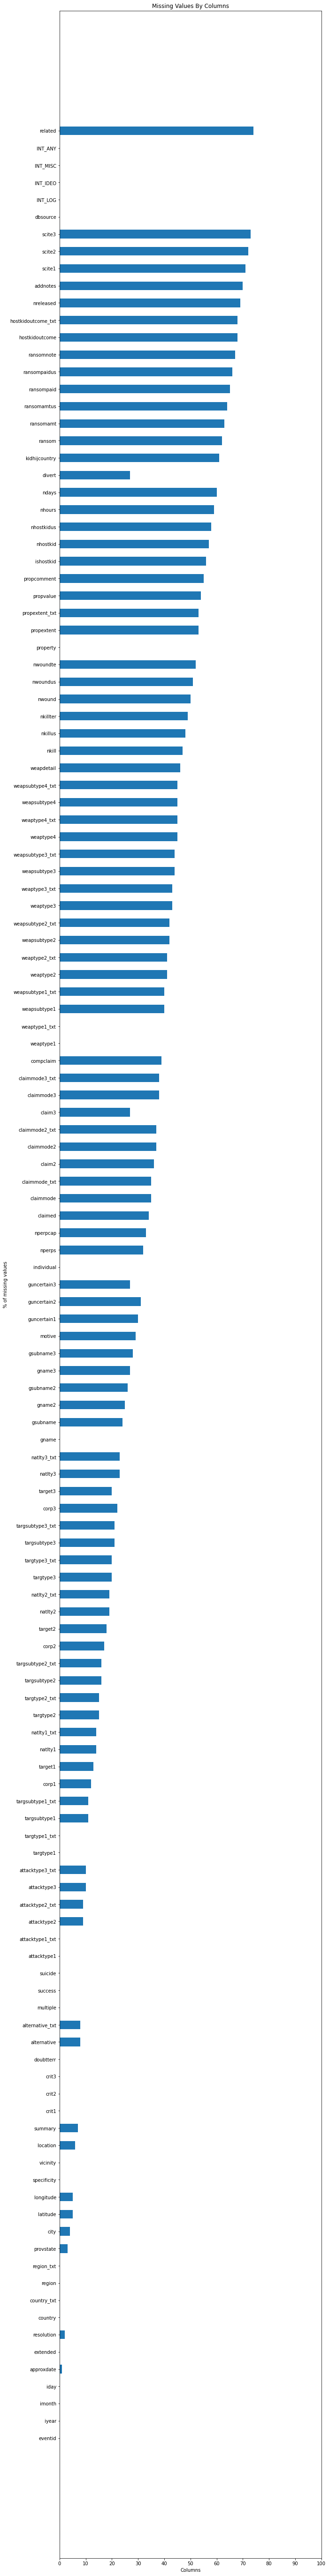

In [12]:
#checking percentage of missing data
missing_columns = []
missing_percent = []
for i in df.columns:
    percent = (df[i].isna().sum()*100)/total_length
    per = "{:.2f}".format(percent)
    missing_percent.append(per)
    if percent>30:
        missing_columns.append(i)
        
fig,ax = plt.subplots(figsize=(10,100))
ax.barh(df.columns,
        missing_percent,
        0.5
       )
ax.set(title = "Missing Values By Columns",
      xlabel = "Columns",
      ylabel = "% of missing values");
xt = np.arange(0,101,10)
plt.xticks(xt,range(0,101,10));

As we can see that some of the columns have more than 90% of missing values.
so we will consider only selected columns for analysis.
These Columns will be:
1.	eventid
2.	iyear
3.	imonth
4.	iday
5.	extended
6.	country_txt
7.	region_txt
8.	provstate
9.	city
10.	latitude
11.	longitude
12.	success
13.	suicide
14.	attacktype1_txt
15.	targtype1_txt
16.	target1
17.	gname
18.	weaptype1_txt
19.	nkill

First we will create a new data set and then rename these columns for our ease.

In [13]:
#creatin new dataset.
data  = df[['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
'country_txt',
'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
'success',
 'suicide',
'attacktype1_txt',
'targtype1_txt',
'target1',
'gname',
'weaptype1_txt',
'nkill',]
].copy()
data.head()

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,target1,gname,weaptype1_txt,nkill
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,Unknown,1.0
1,197000000002,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,Unknown,0.0
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Employee,Unknown,Unknown,1.0
3,197001000002,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,Explosives,NaN
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,Incendiary,NaN


In [14]:
# renaming specific columns for our ease
data.rename(columns = {'iyear':'year', 
                       'imonth':'month',
                       'iday':'day',
                       'country_txt':'country',
                       'region_txt':'region',
                       'attacktype1_txt':'attacktype',
                       'targtype1_txt':'target',
                       'target1':'subtarget',
                       'weaptype1_txt':'weapontype',
                       'nkill':'deaths'   
                      }, inplace = True)

Now we have renamed the columns let's start the Data Preprocessing

# 1. Data Preporcessing

## 1.1 Filling Missing Values

In [15]:
data.isna().sum()

eventid           0
year              0
month             0
day               0
extended          0
country           0
region            0
provstate       421
city            434
latitude       4556
longitude      4557
success           0
suicide           0
attacktype        0
target            0
subtarget       636
gname             0
weapontype        0
deaths        10313
dtype: int64

In [16]:
data.dtypes

eventid         int64
year            int64
month           int64
day             int64
extended        int64
country        object
region         object
provstate      object
city           object
latitude      float64
longitude     float64
success         int64
suicide         int64
attacktype     object
target         object
subtarget      object
gname          object
weapontype     object
deaths        float64
dtype: object

#### Our Strategy

- We will remove all rows missing latitude/longitude/city/provstate.
- We will fill subtarget with mode.
- We will fill deaths with integer mean.


In [17]:
data.dropna(subset = ["city","latitude",'longitude','provstate'], inplace=True)

In [18]:
data['subtarget'].fillna(data['subtarget'].mode()[0],inplace = True)
data['deaths'].fillna(int(data['deaths'].mean()),inplace = True)

In [19]:
data.isna().sum()

eventid       0
year          0
month         0
day           0
extended      0
country       0
region        0
provstate     0
city          0
latitude      0
longitude     0
success       0
suicide       0
attacktype    0
target        0
subtarget     0
gname         0
weapontype    0
deaths        0
dtype: int64

In [20]:
print(f"Day: {data['day'].unique()}")
print(f"Month: {data['month'].unique()}")
print(f"Year: {data['year'].unique()}")

Day: [ 0  1  2  3  6  8  9 10 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4  7
 11 16 17 18 23 24  5 29]
Month: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Year: [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]


We can see we have 0 in day and month column which is invalid.

In [21]:
data.drop(data.loc[data['day']==0].index, inplace=True)
data.drop(data.loc[data['month']==0].index, inplace=True)

In [22]:
len(data)

175501

Afte cleaning the data we are left with 175501 datapoints.

## 1.2 Plotting Graphs for some Useful Insights

### 1.2.1 Number of attacks by Groups

We will plot a bar graph using using gname column

In [23]:
no_of_groups = data['gname'].value_counts()
print(no_of_groups)
print(f"Total No of Groups: {len(no_of_groups)}")

Unknown                                             80629
Taliban                                              7373
Islamic State of Iraq and the Levant (ISIL)          5584
Shining Path (SL)                                    4287
Al-Shabaab                                           3268
                                                    ...  
Bengali Tiger Force (BTF)                               1
Al-Nawaz                                                1
Zionist Resistance Fighters                             1
Organization for the oppresed in Egypt's Prisons        1
People's Revolutionary Union                            1
Name: gname, Length: 3433, dtype: int64
Total No of Groups: 3433


As there are 3450 groups, we'll plot the graph for only top 10 values.

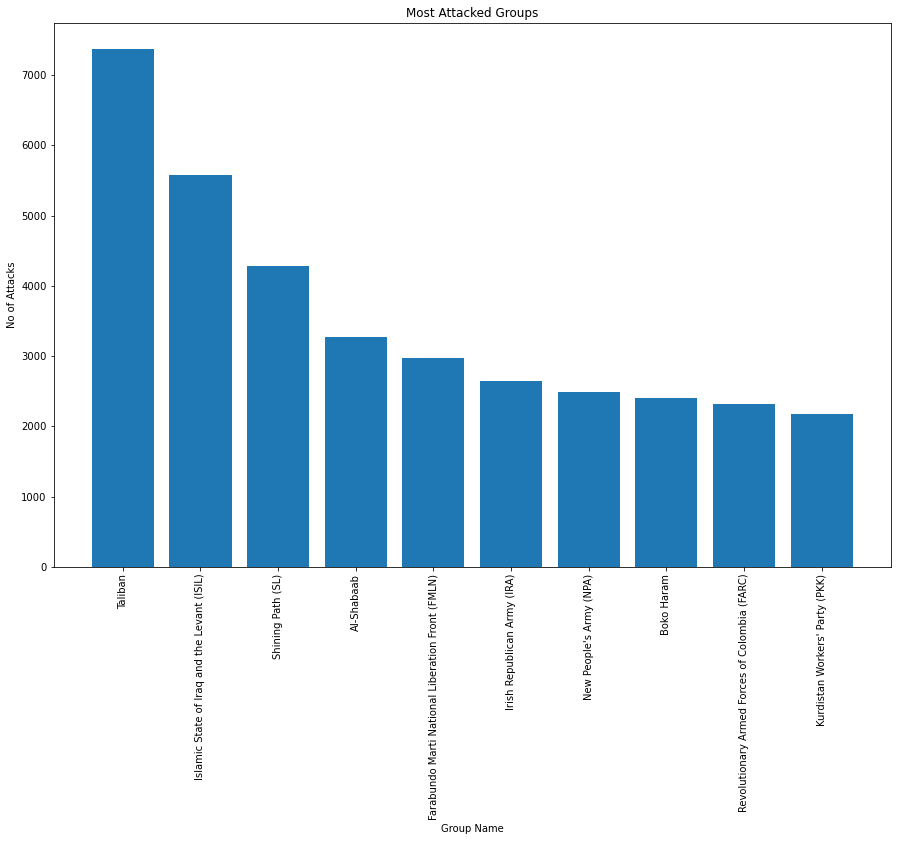

In [24]:
fig,ax = plt.subplots(figsize=(15,10))
ax.bar(data["gname"].value_counts().index[1:11],
       data["gname"].value_counts().values[1:11])
ax.set(title = "Most Attacked Groups",
      xlabel = "Group Name",
      ylabel = "No of Attacks");
plt.xticks(rotation="vertical");

### 1.2.1 Number of attacks by Country

We will plot a bar graph using using country column

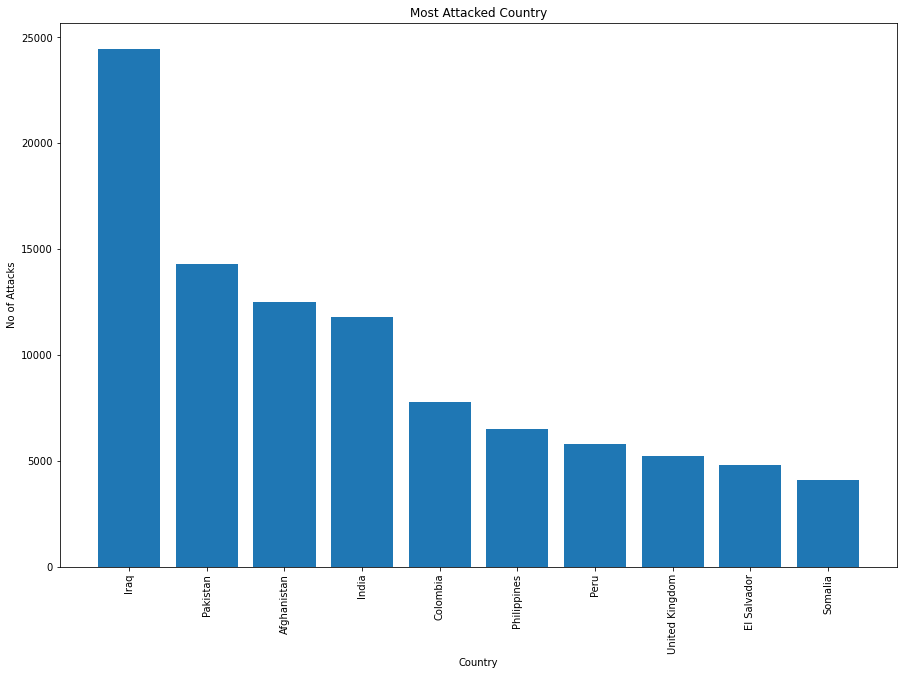

In [25]:
fig,ax = plt.subplots(figsize=(15,10))
ax.bar(data["country"].value_counts().index[:10],
       data["country"].value_counts().values[:10])
ax.set(title = "Most Attacked Country",
      xlabel = "Country",
      ylabel = "No of Attacks");
plt.xticks(rotation="vertical");

### 1.2.1 Number of attacks by Cities

We will plot a bar graph using using city column

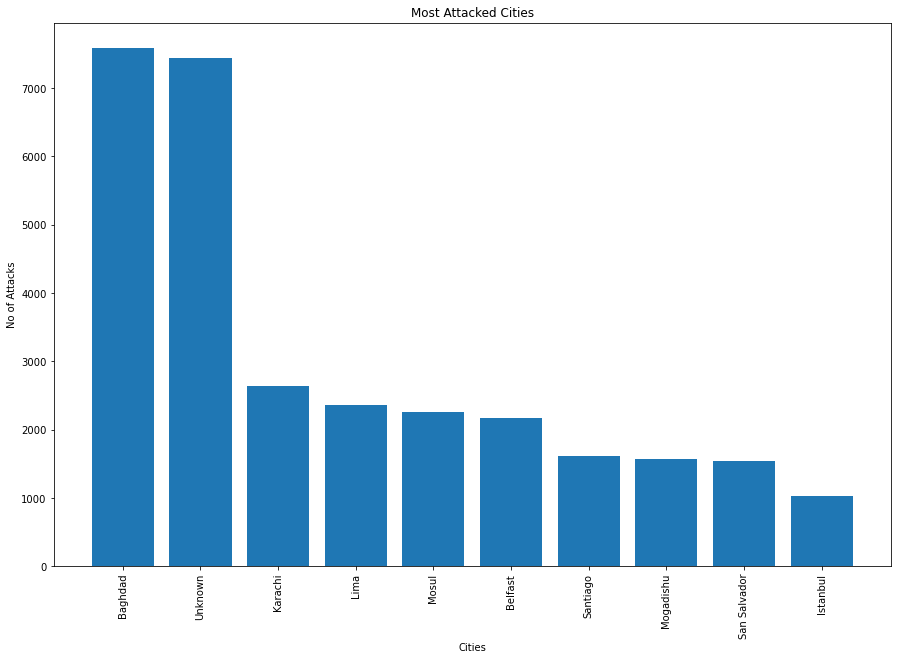

In [26]:
fig,ax = plt.subplots(figsize=(15,10))
ax.bar(data["city"].value_counts().index[:10],
       data["city"].value_counts().values[:10])
ax.set(title = "Most Attacked Cities",
      xlabel = "Cities",
      ylabel = "No of Attacks");
plt.xticks(rotation="vertical");

## Scatter Plot of latitude and longitude

In [27]:
# # from mplcursors import cursor 
# # plt.scatter(x=data['longitude'], y= data['latitude'])
# # cursor(hover=True)
# from matplotlib.widgets import Cursor
# np.random.seed(42)

# fig, ax = plt.subplots()
# ax.scatter(x=data['longitude'], y= data['latitude'])
# ax.set_title("Spatial Analysis")
# cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

# plt.show()
import plotly.express as px
fig = px.scatter(x=data['longitude'], y=data['latitude'])
fig.show()

ModuleNotFoundError: No module named 'plotly'

we can see that we have an outlier at (86.18,12.64), so we need to remove this.

## 1.3 Converting Categrical Columns to Numbers

### 1.3.1 Seperating Features and Labels

In [28]:
X = data.drop('attacktype',axis= 1)
y = data['attacktype']

We will use Label encoder to turn **country, region, provstate, city,target, subtarget, gname, weapontype** to numbers.


cat_cols = ['country', 'region', 'provstate', 'city', 'latitude', 'longitude', 'success', 'suicide', 'attacktype', 'target', 'subtarget', 'gname', 'weapontype']




In [29]:
from sklearn.preprocessing import LabelEncoder

cat_cols = np.array(['country', 'region', 'provstate', 'city', 
            'target', 'subtarget', 'gname', 'weapontype'])

label_encoder = LabelEncoder()

X[cat_cols] = X[cat_cols].apply(LabelEncoder().fit_transform)

In [30]:
X.dtypes

eventid         int64
year            int64
month           int64
day             int64
extended        int64
country         int32
region          int32
provstate       int32
city            int32
latitude      float64
longitude     float64
success         int64
suicide         int64
target          int32
subtarget       int32
gname           int32
weapontype      int32
deaths        float64
dtype: object

We can see that whole data has been transformed to numbers

In [31]:
X.isna().sum()

eventid       0
year          0
month         0
day           0
extended      0
country       0
region        0
provstate     0
city          0
latitude      0
longitude     0
success       0
suicide       0
target        0
subtarget     0
gname         0
weapontype    0
deaths        0
dtype: int64

In [32]:
X.drop(17658,axis  =0, inplace = True) #outlier

In [33]:
y.drop(17658,axis = 0,inplace = True)

## Spatial Clustering

In [34]:
from sklearn.cluster import KMeans
K=range(2,20)
wss = []
for k in K:
        kmeans=KMeans(n_clusters=k)
        kmeans=kmeans.fit(X[['latitude','longitude']])
        wss_iter = kmeans.inertia_
        wss.append(wss_iter)


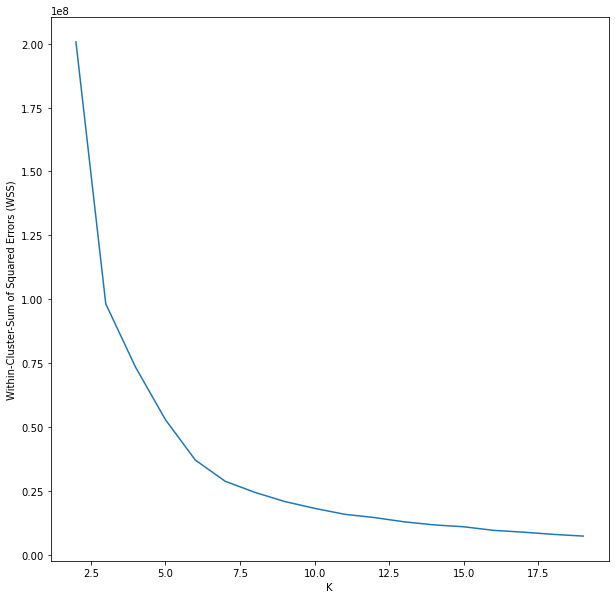

In [35]:
#Plotting the graph
plt.figure(figsize=(10,10))
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)



In [36]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
km=KMeans(n_clusters=7)
y_predicted = km.fit_predict(X[['latitude','longitude']])
y_predicted

array([5, 1, 5, ..., 3, 2, 3])

In [37]:
#Find the centroid
centers = km.cluster_centers_
centers

array([[ 33.68280701,  40.34695666],
       [-19.68387582, -71.89842953],
       [ 28.5095722 ,  74.32724718],
       [  9.17754208, 116.25615645],
       [ 44.41893876,   2.57420144],
       [ 13.93965455, -83.32875862],
       [ -0.34421679,  27.23565633]])

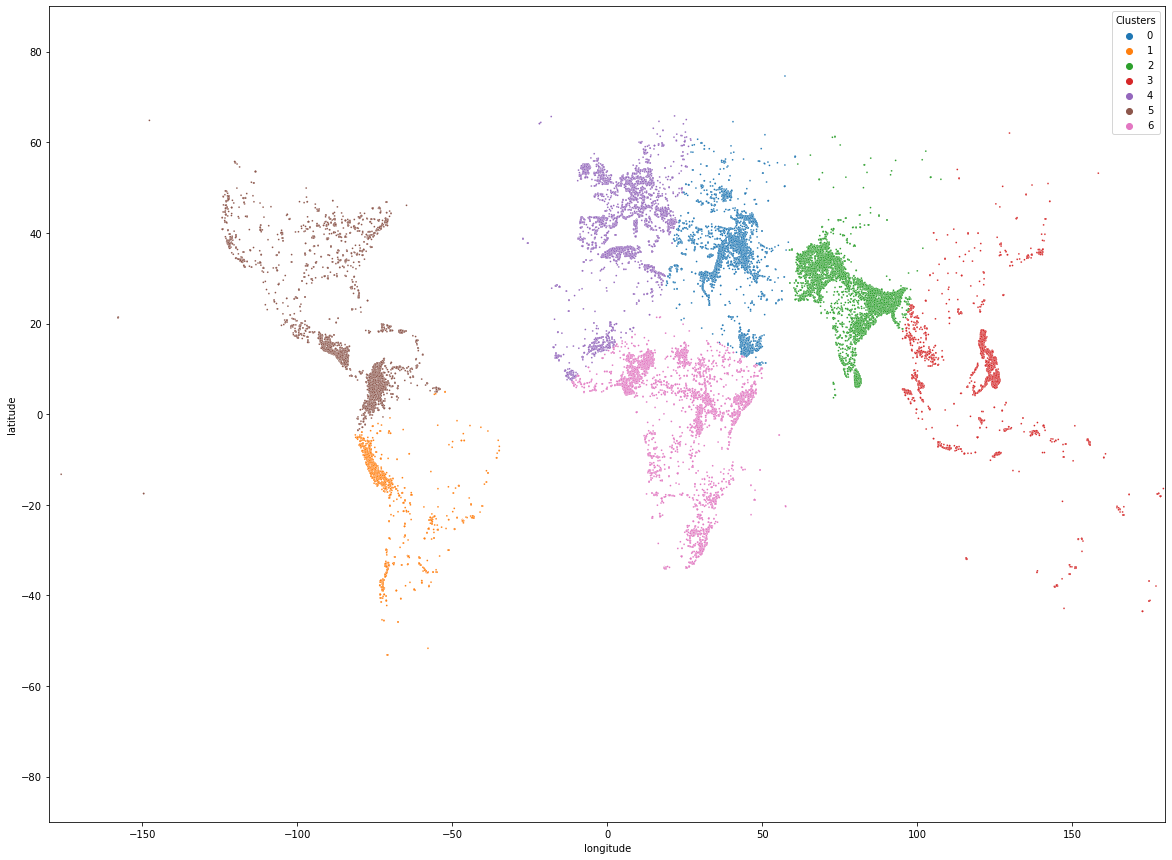

In [38]:
import seaborn as sns
X['Clusters'] = km.labels_
plt.figure(figsize = (20,15))
g = sns.scatterplot(x="longitude", y="latitude",hue = 'Clusters',  data=X,palette='tab10',s=3)
g.set(xlim=(-180,180))
g.set(ylim=(-90,90))
plt.show()

In [39]:
len(y)

175500

In [40]:
# import plotly.express as psx
# X['Clusters'] = km.labels_
# fig = psx.scatter_geo(X,lat= 'latitude',lon = 'longitude',hover_name='city',color = 'Clusters')
# fig.update_traces(marker=dict(size=1))
# fig.show()


In [41]:
# import folium # plotting library
# from folium import plugins
# import matplotlib.cm as cm
# import matplotlib.colors as colors

# X['clusters'] = km.labels_
# map_clusters = folium.Map()

# # set color scheme for the clusters
# x = np.arange(7)
# ys = [i + x + (i*x)**2 for i in range(7)]
# colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# rainbow = [colors.rgb2hex(i) for i in colors_array]

# # add markers to the map
# markers_colors = []
# for lat, lng, cluster, city, country in zip(X['latitude'], X['longitude'],  
#                                             X['clusters'],
#                                          X['city'],
#                                          X['country']):
#     #label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
#     folium.vector_layers.CircleMarker(
#         [lat, lng],
#         radius=1,
#         #popup=label,
#         tooltip = str(city)+ ','+str(country) + '- clusters ' + str(cluster),
#         color=rainbow[cluster-1],
#         fill=True,
#         fill_color=rainbow[cluster-1],
#         fill_opacity=0.9).add_to(map_clusters)
       
# map_clusters

## Temporal Clustering

We will use day, month and year column as time vs event to create clusters.

In [42]:
temp_df = pd.DataFrame()
temp_df['id']  = range(len(X))
temp_df['date'] = pd.to_datetime(X[['year', 'month', 'day']])
cat_cols1 = np.array(['date'])
temp_df[cat_cols1] = temp_df[cat_cols1].apply(LabelEncoder().fit_transform)
temp_df['adate']=pd.to_datetime(X[['year', 'month', 'day']])

In [43]:
X.isna().sum()

eventid       0
year          0
month         0
day           0
extended      0
country       0
region        0
provstate     0
city          0
latitude      0
longitude     0
success       0
suicide       0
target        0
subtarget     0
gname         0
weapontype    0
deaths        0
Clusters      0
dtype: int64

In [44]:
from sklearn.cluster import KMeans
K=range(2,20)
wss = []
for k in K:
        kmeans=KMeans(n_clusters=k)
        kmeans=kmeans.fit(temp_df[['id','date']])
        wss_iter = kmeans.inertia_
        wss.append(wss_iter)


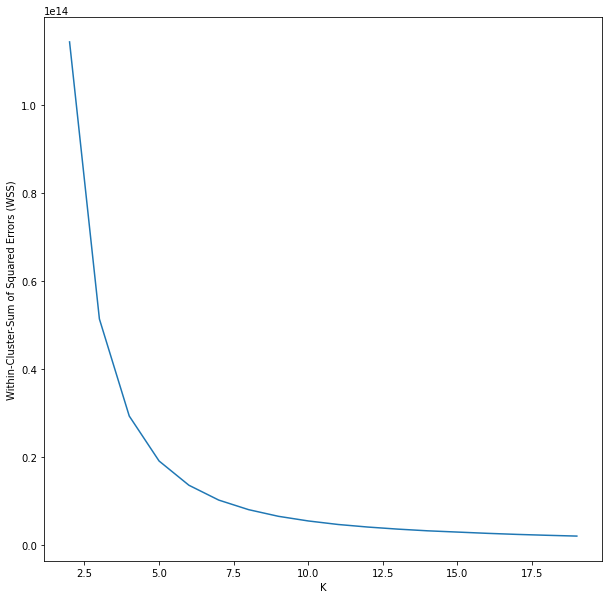

In [45]:
#Plotting the graph
plt.figure(figsize=(10,10))
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)


In [46]:
km=KMeans(n_clusters=5)
y_predicted = km.fit_predict(temp_df[['id','date']])
y_predicted

array([0, 0, 0, ..., 3, 3, 3])

In [47]:
#Find the centroid
centers = km.cluster_centers_
centers

array([[ 17524.71618923,   4638.84213079],
       [122564.94186995,  14491.11260235],
       [ 52443.16420441,   8290.96571051],
       [157917.5       ,  15355.70122853],
       [ 87316.17390931,  12489.6261193 ]])

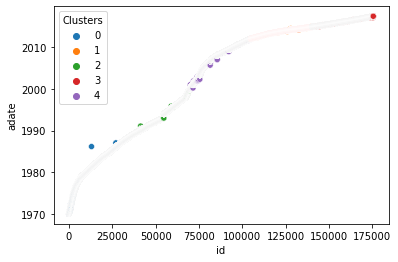

In [48]:
import seaborn as sns
temp_df['Clusters'] = km.labels_
# plt.figure(figsize = (20,15))
g = sns.scatterplot(x="id", y="adate",hue = 'Clusters',  data=temp_df,palette='tab10')
# g.set(xlim=(-180,180))
# g.set(ylim=(-90,90))
plt.show()

In [49]:
X.fillna(X.mean())

,eventid,year,month,day,extended,country,region,provstate,city,latitude,longitude,success,suicide,target,subtarget,gname,weapontype,deaths,Clusters
5,197001010002,1970,1,1,0,188,6,999,6101,37.005105,-89.176269,1,0,12,14969,662,4,0.0,5
6,197001020001,1970,1,2,0,189,7,1619,21573,-34.891151,-56.187214,0,0,12,38617,3184,4,0.0,1
7,197001020002,1970,1,2,0,188,6,434,23481,37.791927,-122.225906,1,0,20,25424,3306,2,0.0,5
8,197001020003,1970,1,2,0,188,6,2717,19296,43.076592,-89.412488,1,0,9,55083,2207,5,0.0,5
9,197001030001,1970,1,3,0,188,6,2717,19296,43.072950,-89.386694,1,0,6,60111,2207,5,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,158,10,1579,6577,2.359673,45.385034,1,0,9,16851,172,4,1.0,6
181687,201712310029,2017,12,31,0,174,5,1351,13855,35.407278,35.942679,1,0,9,33056,2076,2,2.0,0
181688,201712310030,2017,12,31,0,139,9,1458,17320,6.900742,124.437908,1,0,13,34211,587,5,0.0,3
181689,201712310031,2017,12,31,0,79,8,1489,13513,24.798346,93.940430,0,0,6,47922,3306,2,0.0,2


## Spatio Temporal Clustering

In [50]:
st = pd.DataFrame()
st['date'] = temp_df['date'].astype('float')
st['lat'] = X['latitude']
st['lon'] = X['longitude']

In [51]:
len(st)

175500

In [52]:
st.dropna(inplace = True)

In [53]:
st.isna().sum()

date    0
lat     0
lon     0
dtype: int64

In [54]:
from sklearn.cluster import KMeans
K=range(2,20)
wss = []
for k in K:
        kmeans=KMeans(n_clusters=k)
        kmeans=kmeans.fit(st)
        wss_iter = kmeans.inertia_
        wss.append(wss_iter)


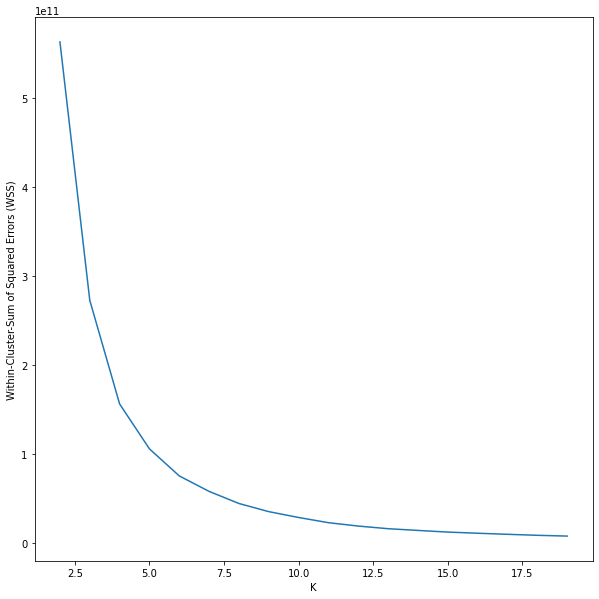

In [55]:
#Plotting the graph
plt.figure(figsize=(10,10))
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [56]:
km=KMeans(n_clusters=6)
y_predicted = km.fit_predict(st)
y_predicted

array([5, 5, 5, ..., 2, 2, 2])

In [57]:
#Find the centroid
centers = km.cluster_centers_
centers

array([[ 1.26449289e+04,  2.71454032e+01,  5.45388279e+01],
       [ 4.55107642e+03,  1.07876025e+01, -3.74308221e+01],
       [ 1.48661019e+04,  2.64421695e+01,  5.17966769e+01],
       [ 9.36346027e+03,  2.44739652e+01,  2.32284730e+01],
       [ 6.91556304e+03,  1.62575117e+01,  2.24273955e+00],
       [ 2.08705790e+03,  3.03414974e+01, -2.52574599e+01]])

In [58]:
from mpl_toolkits import mplot3d

In [1]:
fig = plt.figure()
ax = plt.axes(projection='3d')

NameError: name 'plt' is not defined

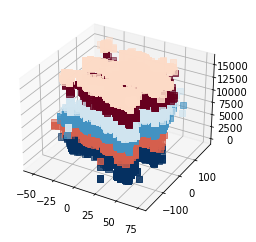

<Figure size 1440x1440 with 0 Axes>

In [60]:
ax = plt.axes(projection='3d')
st['Clusters'] = km.labels_
fig = plt.figure(figsize = (20,20))
x = st['lat']
y = st['lon']
z = st['date']

ax.scatter(x,y,z, marker="s", c=st["Clusters"], s=40, cmap="RdBu")

plt.show();

In [61]:
X['Clusters'] = st['Clusters']

In [62]:
X.fillna(X.mean(),inplace = True)

In [63]:

y = data['attacktype']


In [64]:
y.drop(17658,axis = 0,inplace = True)

In [65]:
X['Clusters'].fillna(X['Clusters'].mode()[0],inplace = True)

__Prediction Model__

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [87]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')

In [101]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
cmat = confusion_matrix(y_test, y_pred)
print (cmat)
print(metrics.accuracy_score(y_test, y_pred))

[[ 6207   598   874   214     0     3   101     1     9]
 [ 1172  1593   693    67     0     3    65     1   127]
 [  602   378 16150    32     1     3    25     3    18]
 [  673   162   160   946     0     2    26     2    71]
 [   33    17    22     4     1     0    34     0    19]
 [   63    19    50    18     2    23    26     0    18]
 [  306   108    57    34     0     0  1505     0   166]
 [   83    17    32    29     1     1     0    34     7]
 [    9    87     9    29     0     3    88     6  1158]]
0.7868091168091168


We have accuracy of 78.6%